# Classification of cover types 
In this project there will be created a model using deep learning to predict forest cover type (the most common kind of tree cover) based only on cartographic variables. The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. The cover types we are going to predict are the following:

- Spruce/Fir
- Lodgepole Pine
- Ponderosa Pine
- Cottonwood/Willow
- Aspen
- Douglas-fir
- Krummholz

The project will use a deeplearning model created with `Tensorflow` and `Keras`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:
print('Python: {}'.format(sys.version))  # Python version
print('numpy: {}'.format(np.__version__))  # Numpy version
print('pandas: {}'.format(pd.__version__))  # Pandas version
print('matplotlib: {}'.format(matplotlib.__version__))  # Matplotlib version
print('sklearn: {}'.format(sklearn.__version__))  # sklearn version
print('tensorflow: {}'.format(tf.__version__))  # tensorflow
print('seaborn: {}'.format(sns.__version__))  # seaborn

# Exploration of the dataset



In [ ]:
df = pd.read_csv('cover_data.csv')
df.head(5)

## Explanation of dataset

In the dataset there are 55 columns, the last one `Class_type` is the label column (meaning the one we want to predict). The other 54 columns consists of both numerical and categorical attributes. Columns 0-10 are numerical, while 11-54 are categorical. Below one can see an explanation of the different columns. This information can be found at [Kaggle](https://www.kaggle.com/uciml/forest-cover-type-dataset).

| Feature Name | Names |
| ------------ | ----- |
| Wilderness_Area1 | Rawah Wilderness Area |
| Wilderness_Area2 | Neota Wilderness Area |
| Wilderness_Area3 | Comanche Wilderness Area |
| Wilderness_Area4 | Cache La Poudre Wilderness Area |
| Soil_Type1 | Cathedral family - Rock outcrop complex, extremely stony |
| Soil_Type2 | Vanet - Ratake families complex, very stony |
| Soil_Type3 | Haploborolis - Rock outcrop complex, rubbly |
| Soil_Type4 | Ratake family - Rock outcrop complex, rubbly |
| Soil_Type5 | Vanet family - Rock outcrop complex, rubbly |
| Soil_Type6 | Vanet - Wetmore families - Rock outcrop complex, stony |
| Soil_Type7 | Gothic family |
| Soil_Type8 | Supervisor - Limber families complex |
| Soil_Type9 | Troutville family, very stony |
| Soil_Type10 | Bullwark - Catamount families - Rock outcrop complex, rubbly |
| Soil_Type11 | Bullwark - Catamount families - Rock land complex, rubbly |
| Soil_Type12 | Legault family - Rock land complex, stony |
| Soil_Type13 | Catamount family - Rock land - Bullwark family complex, rubbly |
| Soil_Type14 | Pachic Argiborolis - Aquolis complex |
| Soil_Type15 | _unspecified in the USFS Soil and ELU Survey_ |
| Soil_Type16 | Cryaquolis - Cryoborolis complex |
| Soil_Type17 | Gateview family - Cryaquolis complex |
| Soil_Type18 | Rogert family, very stony |
| Soil_Type19 | Typic Cryaquolis - Borohemists complex |
| Soil_Type20 | Typic Cryaquepts - Typic Cryaquolls complex |
| Soil_Type21 | Typic Cryaquolls - Leighcan family, till substratum complex |
| Soil_Type22 | Leighcan family, till substratum, extremely bouldery |
| Soil_Type23 | Leighcan family, till substratum, - Typic Cryaquolls complex. |
| Soil_Type24 | Leighcan family, extremely stony |
| Soil_Type25 | Leighcan family, warm, extremely stony |
| Soil_Type26 | Granile - Catamount families complex, very stony |
| Soil_Type27 | Leighcan family, warm - Rock outcrop complex, extremely stony |
| Soil_Type28 | Leighcan family - Rock outcrop complex, extremely stony |
| Soil_Type29 | Como - Legault families complex, extremely stony |
| Soil_Type30 | Como family - Rock land - Legault family complex, extremely stony |
| Soil_Type31 | Leighcan - Catamount families complex, extremely stony |
| Soil_Type32 | Catamount family - Rock outcrop - Leighcan family complex, extremely stony |
| Soil_Type33 | Leighcan - Catamount families - Rock outcrop complex, extremely stony |
| Soil_Type34 | Cryorthents - Rock land complex, extremely stony |
| Soil_Type35 | Cryumbrepts - Rock outcrop - Cryaquepts complex |
| Soil_Type36 | Bross family - Rock land - Cryumbrepts complex, extremely stony |
| Soil_Type37 | Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony |
| Soil_Type38 | Leighcan - Moran families - Cryaquolls complex, extremely stony |
| Soil_Type39 | Moran family - Cryorthents - Leighcan family complex, extremely stony |
| Soil_Type40 | Moran family - Cryorthents - Rock land complex, extremely stony |


In [ ]:
x, y = df.shape
print('We have ', x, ' number of observations and ', y-1, ' features for this dataset to predict type of forest cover.')

dict_count = Counter(df['class'])

for x in dict_count :
    print(f"Cover type {x} has {dict_count[x]} rows in data set")
print(f"This means there are {len(dict_count)} classes to predict")


The classes/cover types has these keys:

| Key | Name                 |  Count |
|-----|----------------------|--------|
| 1   | Spruce / Fir         | 211840 |
| 2   | Lodgepole Pine       | 283301 |
| 3   | Ponderosa Pine       |  35754 |
| 4   | Cottonwood / Willow  |  2747  |
| 5   | Aspen                |  9493  |
| 6   | Douglas-fir          | 17367  |
| 7   | Krummholz            | 20510  |

Now, lets look even more closely at the dataset

In [ ]:
df.info()

By looking at the table we see that all rows are numeric integers, so there is no need for converstions. We can also notice that every row has a non-null value.

## Observations

### Numerical features

In [ ]:
numerical_features = df.iloc[:, :10]
numerical_features.describe()

- Mean: By looking at the mean value we see that it varies from column `Slope` at value 14  and all the way up to 2959 which belongs to `Elevation`. 
- Standard deviation: Describes how much each column deviates from its mean, so basically how much the data varies for a given column. The most spread out column is `Horizontal_Distance_To_Roadways`. The most dense column is `Slope`.
- Min: All of the attributes has a minimum value of 0, except from `Elevation` and `Vertical_Distance_To_Hydrology`. 

We can also see that the only numerical columns are: `Elevation`, `Aspect`, `Slop`, `Horizontal_Distance_To_Roadways`, `Vertical_Distance_To_Hydrology`, `Hillside_9am`, `Hillshade_Noon`, `Hillshade_3pm`,	`Horizontal_Distance_To_Fire_Points`. Meaning the 10 first columns in the data set. We can plot the numerical spread of these features. The rest of the columns are categorical. 


In [ ]:
plt = matplotlib.pyplot

# plot bg
sns.set_style("whitegrid")

#Size of the plot
plt.subplots(figsize=(21, 14))

# setting color of the plot
color = sns.color_palette('pastel')

# Using seaborn to plot it horizontally with 'color'
sns.boxplot(data = numerical_features, orient='h', palette=color)

# Title of the graph
plt.title('Spread of data in Numerical Features', size = 20)

# Horizontal axis Label
plt.xlabel('Observations', size = 17)
# Vertical axis Label
plt.ylabel('Features', size = 17)

# x-axis label size
plt.xticks(size = 17)
#y-axis label size
plt.yticks(size = 15)

# display plot
plt.show()

### Categorical features

There are two types of categorical features: 
- `Wilderness_AreaX` 
- `Soil_typeX`

In this section there will be a description of these two features. 

In [ ]:
categorical_features = df.iloc[:, 10:-1]

# Splitting the features 
wild_df, soil_df = categorical_features.iloc[:,:4], categorical_features.iloc[:,4:]
# Describing the categorical features
categorical_features.describe()

In [ ]:
sns.set_style({'grid.color': 'white'})


# Sum the data, plot bar with given size using color defined
wild_df.sum().plot(kind='bar', figsize=(10, 8), color='#A40E4C')

# Title of the graph
plt.title('No. of observations of Wilderness Areas', size = 20)

# Horizontal axis Label
plt.xlabel('Wilderness Areas', size = 17)
# Vertical axis Label
plt.ylabel('No.of Observation', size = 17)

# x-axis label size, setting label rotations
plt.xticks(rotation = 'horizontal', size = 14)
# y-axis label size
plt.yticks(size = 14)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

As one can see most of the data belongs to `Wilderness_Area1` and `Wilderness_Area3`

In [ ]:
# Background style
sns.set_style({'grid.color': 'white'})

# Sum the data, plot horizontal bar with given size using color defined
soil_df.sum().plot(kind='bar', figsize=(24, 12), color='#A40E4C')

# Title of the graph
plt.title('No. of observations of Soil Types', size = 20)

# Horizontal axis Label
plt.xlabel('Soil Types', size = 20)
# Vertical axis Label
plt.ylabel('Observations', size = 20)

# X-axis label size, setting label rotations
plt.xticks(rotation = 90, size = 15)
# Y-axis label size
plt.yticks(size = 15)

# Display plot
plt.show()

Here most of the rows in the columns has the `Soil_Type29`. Which is Como - Legault families complex, extremely stony.

In [ ]:
# Grid color
sns.set_style({'grid.color': 'white'})

# Sum soil_df values, and pass it as a series 
soil_sum = pd.Series(soil_df.sum())

# Sort the values in descending order
soil_sum.sort_values(ascending = False, inplace = True)

# Plot horizontal bar with given size using color defined
soil_sum.plot(kind='barh', figsize=(23, 17), color= '#A40E4C')

# Horizontal bar flips columns in ascending order, this will filp it back in descending order
plt.gca().invert_yaxis()

# Title of the graph
plt.title('No. of observations of Soil Types', size = 20)

# Horizontal axis Label
plt.xlabel('No.of Observation', size = 17)
# Vertical axis Label
plt.ylabel('Soil Types', size = 17)

# X-axis label
plt.xticks(rotation = 'horizontal', size = 15)
# Y-axis label 
plt.yticks(size = 16)

# Display plot
plt.show()

The `Soil_Type15` has the fewest numbers of observations, while the most observed is `Soil_Type29`


## Violin plots
Here I will be comparing each feature in the data to the target variable. This will visualize the density and the distribution of each target variable's class in comparison to each feature. I will begin with the numerical features


In [ ]:
numerical_cols = numerical_features.columns
target = df['class']

In [ ]:
def violinPlot(column,data,features):
    #figure size
    plt.subplots(figsize=(16, 11))
    
    # Plot violin for column
    sns.violinplot(data=data, x=target, y = features[column])
    
    # x-axis label size
    plt.xticks(size = 15)
    # y-axis label size
    plt.yticks(size = 16)

    # Horizontal axis Label
    plt.xlabel('Forest Cover Types', size = 17)
    # Vertical axis Label
    plt.ylabel(features[column], size = 17)
  
    # display plot
    plt.show()

### Numerical features

In [ ]:
for i in range(len(features)):
    violinPlot(i, numerical_features,numerical_cols)

There is a lot of information given from each plot: 
1. `Elevation` - takes on a wide range of values and classes. All of the classes are covered by the elevations. Most of the elevations between 2000m - 2500m belongs to class 3. Class 7 takes on the maximum value of ~4000m. One can also see that most of the highest elevations belongs to class 7. Class 7 has a broad range of elevations from roughly ~2700m to ~4000m.
2. `Aspect` has a normal distributions for each given class.
3. `Slope` is the features which takes on the fewest values and is measured in degrees. 
4. `Horizontal_distance_To_Hydrology` all values will have a range between 0m - 50m.
5. `Vertical_distance_To_Hydrology` all the values varies from ~ -150m to 600m. This feature has the lowest minimum of all the features which belongs to class 2. This means that class 2 has the widest range of observations. 


### Categorical features

In [ ]:
wild_data_cols = wild_df.columns

for i in range(0, len(wild_data_cols)):
    violinPlot(i, wild_df,wild_data_cols)


These plots looks quite different because the data only contains values of 0 and 1. 
By looking at the plots one can see: 
1. `Wilderness_Area1` either belongs to `Cover_Type` 1,2, 5 and 7. 
2. `Wilderness_Area3` is present in all `Cover_Type` but not in type 3. 
3. `Wilderness_Area2` has less observations and shows less density on 1. 
4. `Wilderness_Area4` also has few observations and is more dense at 0.


## Correlation

Lets try to find out how correlated the data is. In this section the categorical features will be ignored (because correleation doesn't work that well with non-contionus data :) )

In [ ]:
plt.subplots(figsize=(15, 10))

# Compute the correlation matrix
numerical_features_corr = numerical_features.corr()

mask = np.zeros_like(numerical_features_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Generates heatmap masking the upper triangle and shrinking the cbar
sns.heatmap(numerical_features_corr, mask=mask, center=0, square=True, annot=True, annot_kws={"size": 15}, cbar_kws={"shrink": .8})

# x-axis label size
plt.xticks(size = 13)
# y-axis label size
plt.yticks(size = 13)

# display plot
plt.show()


Explanation of the colors:
- The features which are colored black have less or no correlation.
- The boxes which are colored orange have high and positive correlation
- The blue boxes has negative correlation

The less the values are correleated the more valuable information does the feature have to tell our model. Therefore these features are important for the predictions made by the model. 

Observations: 
- `Hillside_noon` and `Hillshade_3pm`,  `Hillshade_3pm` and `Aspect` and `Vertical_Distance_To_Hydrololgy` and `Horizontal_Distance_To_Hydrololgy` are highly correleated. 

Now we can plot the correlations which are higher than 0.5. 

In [ ]:
# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# giving list of lists
# inner lists conatains pairs of feature which have high correlation
list_df_corr = [['Aspect','Hillshade_3pm'], ['Aspect', 'Hillshade_9am'], ['Slope', 'Hillshade_Noon'], ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], 
                 ['Hillshade_3pm', 'Hillshade_9am'], ['Hillshade_3pm', 'Hillshade_Noon']]


# Looping through outer list
# taking 2 features from inner list
for i,j in list_df_corr:
    
    # fig size
    plt.subplots(figsize=(15, 12))
    
    #plot 1 feature on x axis and other on y axis, each point shows which cover forest they belong to
    sns.scatterplot(data = df, x = i, y = j, hue="class", legend = 'full', palette='pastel')

    # x-axis label size
    plt.xticks(size = 15)
    # y-axis label size
    plt.yticks(size = 15)

    # Horizontal axis Label
    plt.xlabel(i, size = 17)
    # Vertical axis Label
    plt.ylabel(j, size = 17)
  
    # display plot
    plt.show()

- `Hillshade_3pm` and `Aspect`: has the same relationship has a sigmoid function. 
- `Hillshade_9am` and `Aspect`: In the interval of `Aspect` ranging from 50 - 250 and `Hillshade_9am` between 100 - 250 most of the cover type belongs to class 3.
- `Hillshade_Noon` and `Slope`: When `Slope` has the value between 0-30 most of the cover types belongs to class 3, regardless of what the `Hillside_Noon` value is. While higher slope values mostly belongs to classes 1, 5 and 7. 
- `Vertical_Distance_To_Hydrology` and `Horizontal_Distance_To_Hydrology`  This pattern just looks dope. 
- `Hillshade_3pm` and `Hillshade_9am`: This has the shape of a quarter of a circle, where most of the points along the border is of the cover type 3.
- `Hillshade_Noon` and `Hillshade_3pm`:  This almost has the same shape as above and here also most of the points along the border is of cover type 3.

# Preprocessing the data

In [16]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=102)

le = LabelEncoder()

y_train = le.fit_transform(y_train.astype(str))
y_test = le.transform(y_test.astype(str))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [22]:
X_train.shape[1]

54

# Build and train model

In [25]:
def create_model(X_train):
    model = Sequential()
    # Creating the input layer
    input = InputLayer(input_shape=(X_train.shape[1],))
    model.add(input)

    # Hidden layer
    model.add(Dense(256,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))

    #Output layer
    model.add(Dense(7,activation='softmax'))

    # Printing the model
    print(model.summary())

    opt = Adam(learning_rate=0.0005)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])

    return model



In [26]:
model = create_model(X_train)
es = EarlyStopping(monitor='accuracy', mode='min', verbose=1, patience=20)
history = model.fit(X_train, y_train, epochs=100, batch_size=100, verbose = 1, validation_split=.3, callbacks=[es])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 256)               14080     
_________________________________________________________________
dense_36 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_39 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_40 (Dense)             (None, 7)                 231       
Total params: 38,055
Trainable params: 38,055
Non-trainable params: 0
__________________________________________________

# Classification report

# Plots

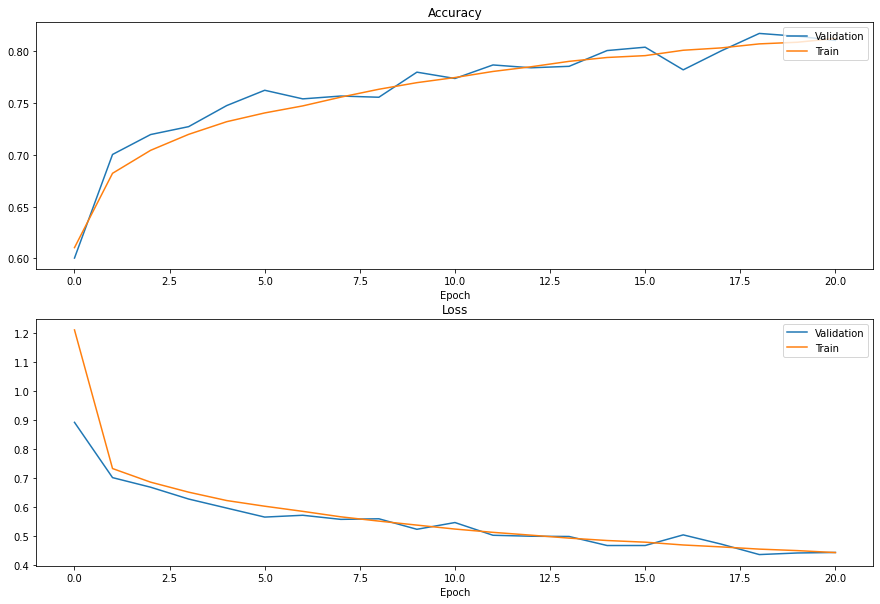

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure(figsize=(15,10))
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(val_loss)
ax2.plot(loss)
ax2.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Validation', 'Train'], loc='upper right')

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(val_acc)
ax1.plot(acc)
ax1.set_title('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Validation', 'Train'], loc='upper right')

plt.show()